## Plot the clustering different between splits

In [144]:
import os
os.environ["MPICH_GPU_SUPPORT_ENABLED"] = "0"
import sys
import random
import numpy as np
from pathlib import Path
import lsstypes as types
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pypower import CatalogFFTPower, PowerSpectrumMultipoles, setup_logging
from astropy.table import Table,join,Column

In [172]:
sys.path.append('../')
from helper import REDSHIFT_BIN_LSS
%load_ext autoreload
%autoreload 2
%matplotlib inline

def load_mesh2_spectrum_poles(filename):
    result = types.read(filename)
    sl = slice(0, None, 5)  # rebin to dk = 0.005 h/Mpc
    oklim = (0.02, 0.3)  # fitted k-range, no need to go to higher k
    # result = result.select(k=sl).select(k=oklim)
    k = result.get(ells=0).coords('k')
    Pk = {ell: result.get(ells=ell).values() for ell in result.ells}
    return k, Pk

def get_measurement_fn(kind='mesh2_spectrum_poles', version='dr2-v1.1', recon=None, tracer='LRG', region='NGC', zrange=(0.8, 1.1), cut=None, auw=None, nran = 18, weight_type='default', local =True ,**kwargs):
    base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/{version}/data_splits')
    if local == True:
        base_dir = Path(f'/pscratch/sd/s/shengyu/Y3/blinded/{version}/data_splits')
    if cut: cut = '_thetacut'
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
    return str(base_dir / f'{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}_{region}_{weight_type}{auw}{cut}_nran{nran}.h5')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_BGS_BRIGHT-21.35_z0.1-0.4_GCcomb_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_BGS_BRIGHT-21.35_z0.1-0.4_NGC_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_BGS_BRIGHT-21.35_z0.1-0.4_SGC_default_fkp_nran18.h5


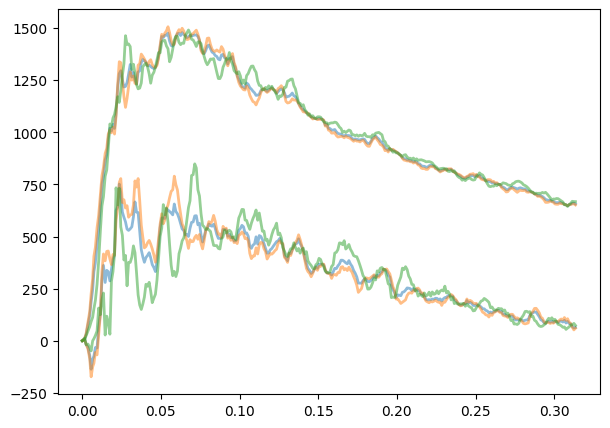

/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.4-0.6_GCcomb_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.4-0.6_NGC_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.4-0.6_SGC_default_fkp_nran18.h5


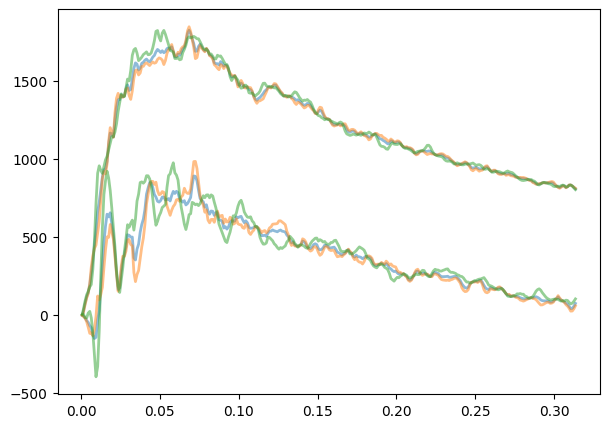

/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.6-0.8_GCcomb_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.6-0.8_NGC_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.6-0.8_SGC_default_fkp_nran18.h5


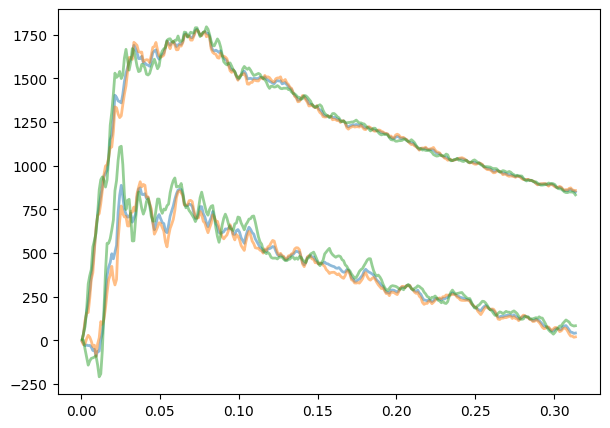

/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.8-1.1_GCcomb_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.8-1.1_NGC_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_LRG_z0.8-1.1_SGC_default_fkp_nran18.h5


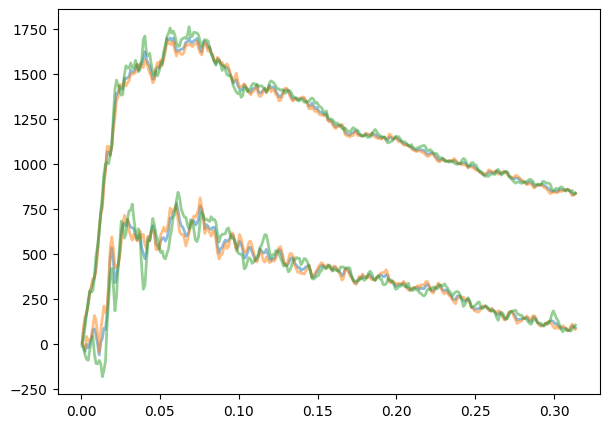

/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_ELG_LOPnotqso_z0.8-1.1_GCcomb_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_ELG_LOPnotqso_z0.8-1.1_NGC_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_ELG_LOPnotqso_z0.8-1.1_SGC_default_fkp_nran18.h5


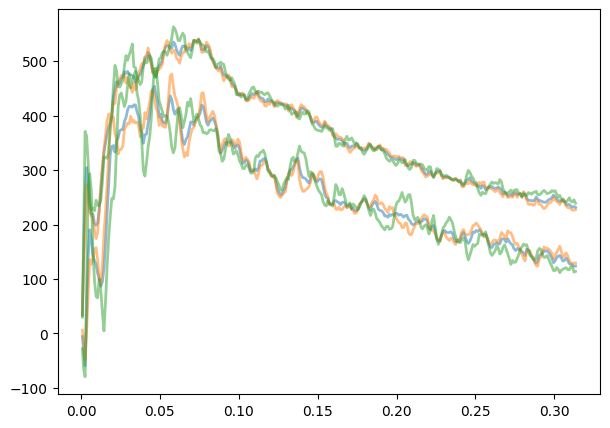

/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_ELG_LOPnotqso_z1.1-1.6_GCcomb_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_ELG_LOPnotqso_z1.1-1.6_NGC_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_ELG_LOPnotqso_z1.1-1.6_SGC_default_fkp_nran18.h5


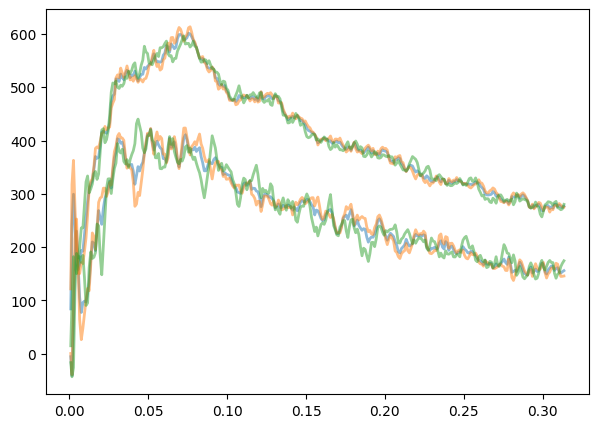

/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_QSO_z0.8-2.1_GCcomb_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_QSO_z0.8-2.1_NGC_default_fkp_nran18.h5
/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/dr2-v2/data_splits/blinded_mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp_nran18.h5


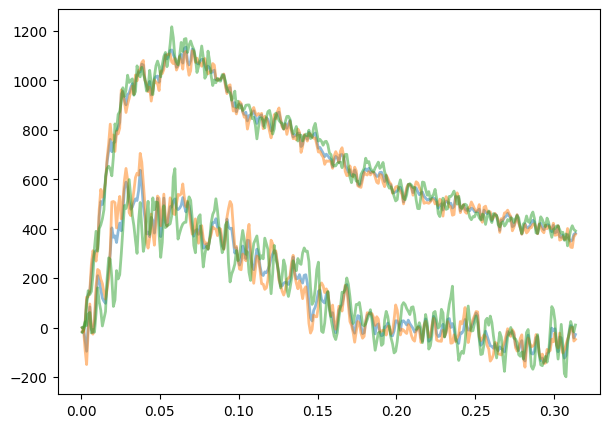

In [182]:
version = 'dr2-v2'

for tracer in ['BGS','LRG','ELG','QSO']:
    if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35'
    if 'ELG' in tracer: tracer = 'ELG_LOPnotqso'
    for zrange in REDSHIFT_BIN_LSS[tracer[:3]]:
        fig = plt.figure(figsize=(7, 5))
        for i, region in enumerate(['GCcomb', 'NGC', 'SGC']):
            data_args = {'tracer':tracer, 'zrange':zrange, 'region':region, 'weight_type':'default_fkp', 'version':version}
            fn = get_measurement_fn(**data_args, kind = 'blinded_mesh2_spectrum_poles', local=False)
            print(fn)
            k, Pk = load_mesh2_spectrum_poles(fn)
            for ell in [0,2]:
                label = f'blinded {tracer} {region}' if ell ==0 else None 
                plt.plot(k,k*Pk[ell]['value'], label = label, color = f'C{i}', lw=2, alpha=0.5)
            # fn = get_measurement_fn(**data_args, kind = 'blinded_mesh2_spectrum_poles', local=True)
            # print(fn)
            # k, Pk = load_mesh2_spectrum_poles(fn)
            # for ell in [0,2]:
            #     label = f'blinded {tracer} {region}' if ell ==0 else None 
            #     plt.plot(k,k*Pk[ell]['value'], label = label, color = f'C{i}', lw=1)
            # plt.legend()
        plt.show()


/pscratch/sd/s/shengyu/Y3/blinded/dr1-v1.5/data_splits/mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp_nran18_o.h5
/pscratch/sd/s/shengyu/Y3/blinded/dr1-v1.5/data_splits/mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp_nran18_o_mb.h5
/pscratch/sd/s/shengyu/Y3/blinded/dr1-v1.5/data_splits/mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp_nran18_o_mb_SGC.h5


Text(0, 0.5, 'SGC Pk0')

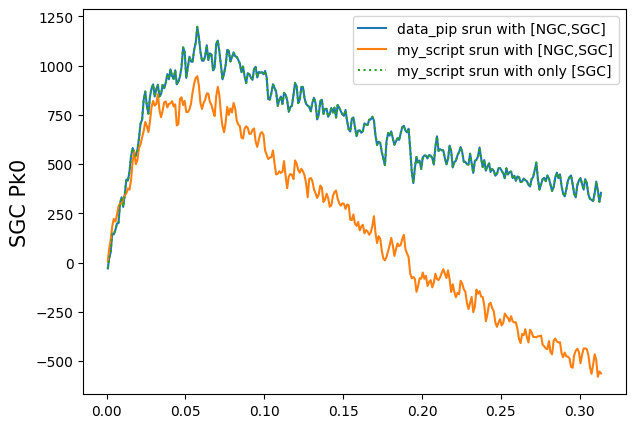

In [179]:
version = 'dr1-v1.5'

fig = plt.figure(figsize=(7, 5))
for tracer in ['QSO']:
    if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35'
    if 'ELG' in tracer: tracer = 'ELG_LOPnotqso'
    for zrange in REDSHIFT_BIN_LSS[tracer[:3]]:
        for i, region in enumerate(['SGC']):
            data_args = {'tracer':tracer, 'zrange':zrange, 'region':region, 'weight_type':'default_fkp', 'version':version}
            fn = f'/pscratch/sd/s/shengyu/Y3/blinded/dr1-v1.5/data_splits/mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp_nran18_o.h5'
            print(fn)
            k, Pk = load_mesh2_spectrum_poles(fn)
            for ell in [0]:
                plt.plot(k,k*Pk[ell]['value'], label = 'data_pip srun with [NGC,SGC]', color = 'C0')

for tracer in ['QSO']:
    if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35'
    if 'ELG' in tracer: tracer = 'ELG_LOPnotqso'
    for zrange in REDSHIFT_BIN_LSS[tracer[:3]]:
        for i, region in enumerate(['SGC']):
            data_args = {'tracer':tracer, 'zrange':zrange, 'region':region, 'weight_type':'default_fkp', 'version':version}
            fn = f'/pscratch/sd/s/shengyu/Y3/blinded/dr1-v1.5/data_splits/mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp_nran18_o_mb.h5'
            print(fn)
            k, Pk = load_mesh2_spectrum_poles(fn)
            for ell in [0]:
                plt.plot(k,k*Pk[ell]['value'], label = 'my_script srun with [NGC,SGC]', color = f'C1')

for tracer in ['QSO']:
    if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35'
    if 'ELG' in tracer: tracer = 'ELG_LOPnotqso'
    for zrange in REDSHIFT_BIN_LSS[tracer[:3]]:
        for i, region in enumerate(['SGC']):
            data_args = {'tracer':tracer, 'zrange':zrange, 'region':region, 'weight_type':'default_fkp', 'version':version}
            fn = f'/pscratch/sd/s/shengyu/Y3/blinded/dr1-v1.5/data_splits/mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp_nran18_o_mb_SGC.h5'
            print(fn)
            k, Pk = load_mesh2_spectrum_poles(fn)
            for ell in [0]:
                plt.plot(k,k*Pk[ell]['value'], label = 'my_script srun with only [SGC]', color = f'C2', ls = ':')
plt.legend()

plt.ylabel('SGC Pk0', fontsize = 15)


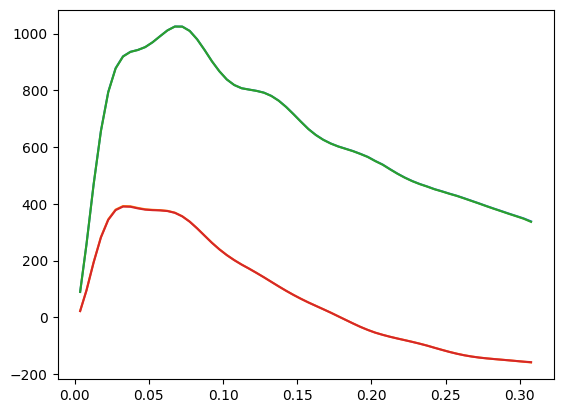

In [68]:
dir = '/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/unblinded_data/dr2-v2'
NGC_fn = dir+'/covariance_mesh2_spectrum_poles_QSO_z0.8-2.1_NGC_default_fkp.h5'
# k, Pk = load_mesh2_spectrum_poles(NGC_fn)
covariance = types.read(NGC_fn)
result = covariance.observable.select(k=slice(0, None, 5))
k = result.get(ells=0).coords('k')
Pk = {ell: result.get(ells=ell).values() for ell in result.ells}

for ell in [0,2]:
    plt.plot(k,k*Pk[ell]['value'])

dir = '/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/unblinded_data/dr2-v2'
SGC_fn = dir+'/covariance_mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp.h5'
# k, Pk = load_mesh2_spectrum_poles(NGC_fn)
covariance = types.read(SGC_fn)
result = covariance.observable.select(k=slice(0, None, 5))
k = result.get(ells=0).coords('k')
Pk = {ell: result.get(ells=ell).values() for ell in result.ells}

for ell in [0,2]:
    plt.plot(k,k*Pk[ell]['value'])

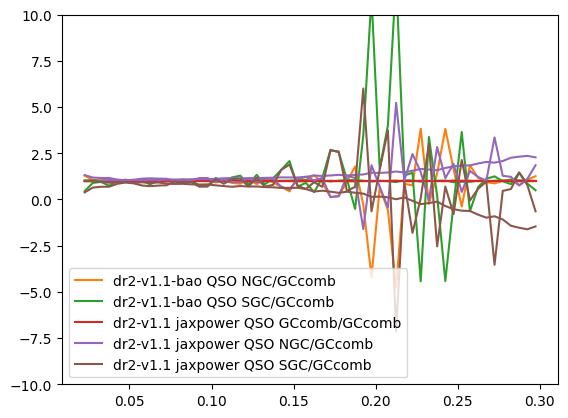

In [31]:
version = 'dr2-v1.1'
dir = '/global/cfs/cdirs/desi/survey/catalogs/DA2/analysis/loa-v1/LSScats/v1.1/BAO/unblinded/desipipe/2pt/pk/'

for i, region in enumerate(['GCcomb', 'NGC', 'SGC']):
    pkpoles_fn = dir+f'pkpoles_QSO_{region}_z0.8-2.1_default_SYS1_FKP_lin_nran18_cellsize6_boxsize10000.npy'
    result = PowerSpectrumMultipoles.load(pkpoles_fn)
    result = result.select((0.02,0.3,0.005))
    pk = np.real(result.get_power())
    k = result.kavg
    if region == 'GCcomb':
        fid_pk = pk
    else:
        for ill in [0,1]:
            label = f'dr2-v1.1-bao {tracer} {region}/GCcomb' if ill==0 else None 
            plt.plot(k, pk[ill]/fid_pk[ill], label = label, color = f'C{i}')
        plt.legend()
for i, region in enumerate(['GCcomb', 'NGC', 'SGC']):
    data_args = {'tracer':tracer, 'zrange':zrange, 'region':region, 'weight_type':'default_fkp', 'version':version}
    fn = get_measurement_fn(**data_args, kind = 'mesh2_spectrum_poles')
    k, pk = load_mesh2_spectrum_poles(fn)
    if region == 'GCcomb':
        fid_pk = pk
    for ell in [0,2]:
        label = f'{version} jaxpower {tracer} {region}/GCcomb' if ell ==0 else None 
        plt.plot(k, pk[ell]['value']/fid_pk[ell]['value'] ,label = label, color = f'C{i+3}')
    plt.legend()
    plt.ylim([-10,10])